In [ ]:
pip install torch==1.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 831.4 MB 15 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.0+cu116 requires torch==1.13.0, but you have torch 1.9.0 which is incompatible.
torchtext 0.14.0 requires torch==1.13.0, but you have torch 1.9.0 which is incompatible.
torchaudio 0.13.0+cu116 requires torch==1.13.0, but you have torch 1.9.0 which is incompatible.


In [ ]:
pip install torchvision==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0+cu116
    Uninstalling torchvision-0.14.0+cu116:
      Successfully uninstalled torchvision-0.14.0+cu116


In [ ]:
pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from detecto.core import Dataset
from detecto.utils import read_image
from detecto.utils import xml_to_csv
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
import torch
from torchvision import transforms

#### Get the current working directory

In [ ]:
drive.mount("/content/drive")
base_path="/content/drive/MyDrive/TrainTestFolders/"

#### Label path and image path. Edit as required

In [ ]:
TRAIN_PATH = os.path.abspath(os.path.join('train'))
TRAIN_LABEL_PATH = os.path.abspath(os.path.join('train_labels_final.csv'))
TEST_PATH = os.path.abspath(os.path.join('test'))
TEST_LABEL_PATH = os.path.abspath(os.path.join('test_labels_final.csv'))

### Display image from train directory

In [ ]:
sample_img=".jpg"
image=read_image(TRAIN_PATH+sample_img)
plt.imshow(image)
plt.show()

#### Detecto train and test dataset.

In [ ]:
Train_dataset = core.Dataset(TRAIN_LABEL_PATH,TRAIN_PATH)
Test_dataset = core.Dataset(TEST_LABEL_PATH,TEST_PATH)

In [ ]:
image,targets=Train_dataset[1]
show_labeled_image(image,targets['boxes'],targets['labels'])

#### Classes List

##### Can be produced using Classes_List.ipynb or simply using the csv file

In [ ]:
classes_list_df=pd.read_csv('Classes_List.csv')
classes_list=list(classes_list_df['filename'])

#### Training

##### Test out different batch sizes to get the most out of the gpu. It should be in the order of 2

In [ ]:
torch.cuda.empty_cache()
loader=core.DataLoader(Train_dataset, batch_size=1, shuffle=True)#L3
model = core.Model(classes_list)
losses = model.fit(loader, Test_dataset, epochs=1, lr_step_size=5, learning_rate=0.0001, verbose=True)#L5
model.save('model_weightsfinal.pth')

#### Prediction [output below not actual predicted values on entire dataset]

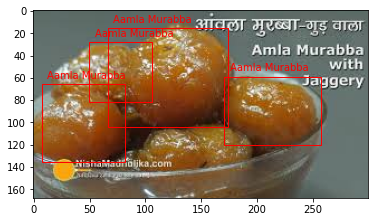

In [ ]:
image=utils.read_image(TEST_PATH+'Aamla Murabba 25.jpg')
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes[0:12], labels[0:12])

In [ ]:
print(labels)
print(boxes)
print(scores)

['Aaloo Chips', 'Aaloo Chips', 'Aaloo Chips']
tensor([[ 98.1575,  85.5081, 157.4206, 145.9293],
        [ 73.2364,  35.3226, 154.9814,  86.0684],
        [164.6031,  44.9310, 222.9315,  85.4577]])
tensor([0.5175, 0.5158, 0.1958])
